### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
train = pd.read_csv('./dataset/Train.csv')

In [3]:
train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,1


### Processing the missing data

In [4]:
# Homogenizing None
train.replace('?', np.nan, inplace=True)
train.replace('None', np.nan, inplace=True)
train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69868 non-null  object
 1   gender                    71236 non-null  object
 2   age                       71236 non-null  object
 3   weight                    2348 non-null   object
 4   admission_type_id         71236 non-null  int64 
 5   discharge_disposition_id  71236 non-null  int64 
 6   admission_source_id       71236 non-null  int64 
 7   time_in_hospital          71236 non-null  int64 
 8   payer_code                34115 non-null  object
 9   medical_specialty         41672 non-null  object
 10  num_lab_procedures        71236 non-null  int64 
 11  num_procedures            71236 non-null  int64 
 12  num_medications           71236 non-null  int64 
 13  number_outpatient         71236 non-null  int64 
 14  number_emergency      

In [6]:
miss_val=(train.isna().sum()/len(train)*100).sort_values(ascending=False)
miss_val[miss_val>0]

weight               96.703914
max_glu_serum        93.076534
A1Cresult            84.027739
payer_code           52.109888
medical_specialty    41.501488
race                  1.920377
diag_3                1.747712
diag_2                0.436577
diag_1                0.025268
dtype: float64

In [7]:
dropped=[]
for col in train.columns:
    if train[col].isna().sum() > 20000:
        dropped.append(col)

In [8]:
train=train.drop(columns=dropped)

In [9]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,1


### Unique data

In [10]:
train['readmitted_NO'].value_counts()

1    37397
0    33839
Name: readmitted_NO, dtype: int64

In [11]:
train.gender.value_counts()

Female             38522
Male               32713
Unknown/Invalid        1
Name: gender, dtype: int64

In [12]:
train[train['gender']=='Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
30506,Other,Unknown/Invalid,[70-80),3,1,1,1,5,5,22,...,No,No,No,No,No,No,No,Ch,Yes,1


In [13]:
train=train.drop(30506)
train=train.reset_index(drop=True)

In [14]:
pd.crosstab(train.age,train.readmitted_NO)

readmitted_NO,0,1
age,,
[0-10),28,124
[10-20),225,350
[20-30),554,637
[30-40),1235,1564
[40-50),3244,3804
[50-60),5638,6744
[60-70),7502,8090
[70-80),9150,9303
[80-90),5551,5723


In [15]:
pd.crosstab(train.diabetesMed,train.insulin)

insulin,Down,No,Steady,Up
diabetesMed,,,,
No,0,17289,0,0
Yes,7610,17884,21783,6669


In [16]:
pd.crosstab(train.diabetesMed,train.readmitted_NO)

readmitted_NO,0,1
diabetesMed,,
No,7231,10058
Yes,26608,27338


### Data Visualization

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


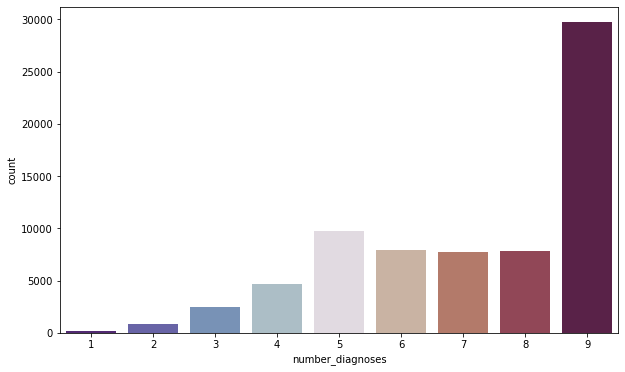

In [17]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(train['number_diagnoses'],palette='twilight_shifted')
plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


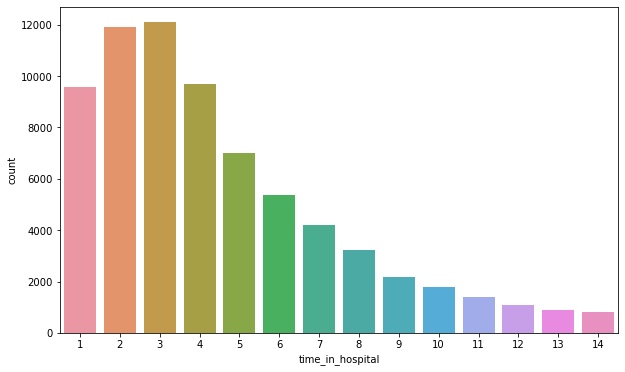

In [18]:
sns.countplot(train['time_in_hospital'])
plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


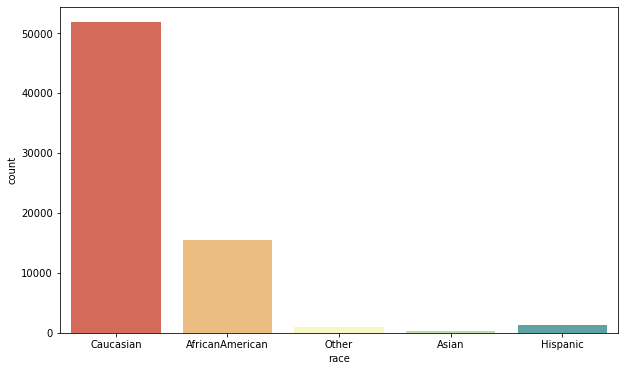

In [19]:
sns.countplot(train.race,palette='Spectral')
plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


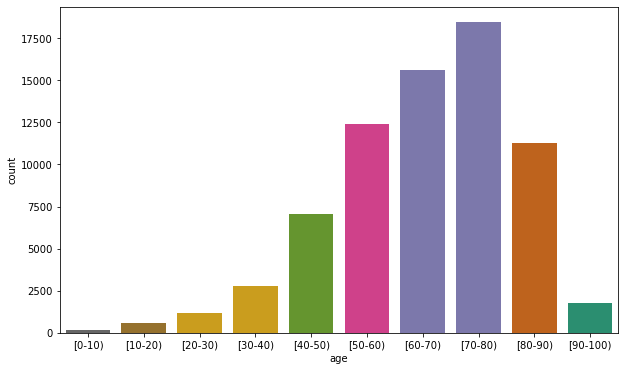

In [20]:
sns.countplot(train.age,palette = 'Dark2_r')
plt.show()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71235 entries, 0 to 71234
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69867 non-null  object
 1   gender                    71235 non-null  object
 2   age                       71235 non-null  object
 3   admission_type_id         71235 non-null  int64 
 4   discharge_disposition_id  71235 non-null  int64 
 5   admission_source_id       71235 non-null  int64 
 6   time_in_hospital          71235 non-null  int64 
 7   num_lab_procedures        71235 non-null  int64 
 8   num_procedures            71235 non-null  int64 
 9   num_medications           71235 non-null  int64 
 10  number_outpatient         71235 non-null  int64 
 11  number_emergency          71235 non-null  int64 
 12  number_inpatient          71235 non-null  int64 
 13  diag_1                    71217 non-null  object
 14  diag_2                

In [22]:
train.race=train.race.fillna(train.race.mode())

### Converting into numeric values

In [23]:
train.diag_1=pd.to_numeric(train.diag_1,errors='coerce')
train.diag_2=pd.to_numeric(train.diag_2,errors='coerce')
train.diag_3=pd.to_numeric(train.diag_3,errors='coerce')

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


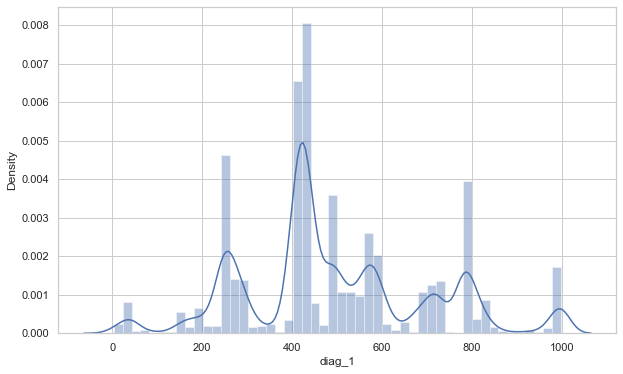

In [24]:
sns.set(style = 'whitegrid')
sns.distplot(train.diag_1)
plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


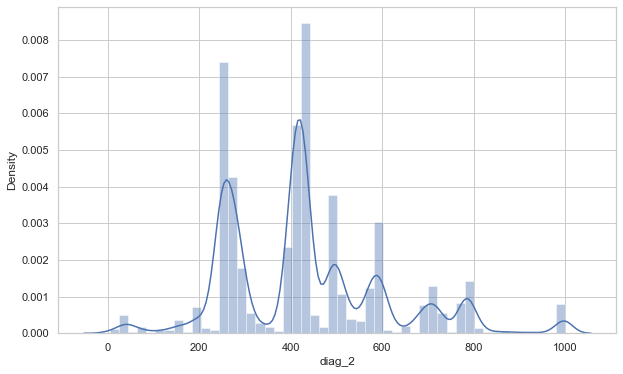

In [25]:
sns.set(style = 'whitegrid')
sns.distplot(train.diag_2)
plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


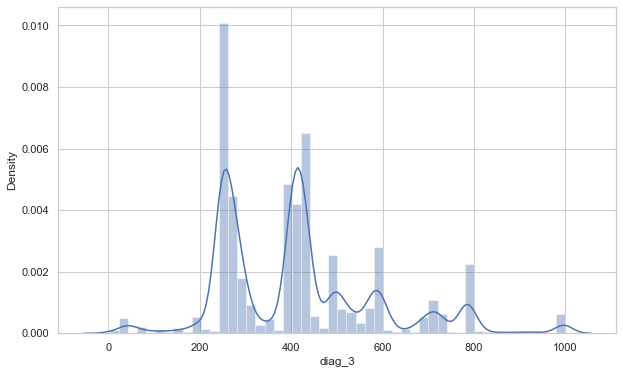

In [26]:
sns.set(style = 'whitegrid')
sns.distplot(train.diag_3)
plt.show()

In [27]:
train.diag_1=train.diag_1.fillna(train.diag_1.mean())
train.diag_2=train.diag_2.fillna(train.diag_2.mean())

In [28]:
train.diag_3.mode()

0    250.0
dtype: float64

In [29]:
train.diag_3=train.diag_3.fillna(250)

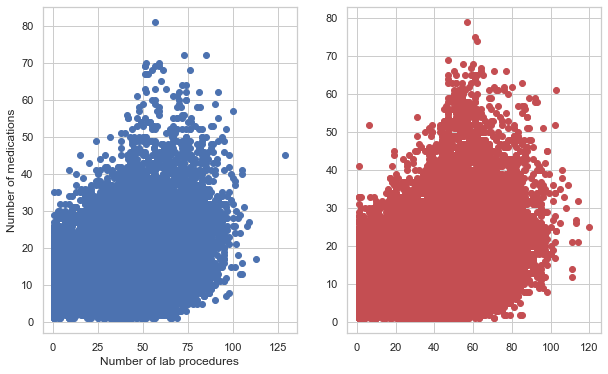

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(x='num_lab_procedures',y='num_medications',data=train[train['readmitted_NO']==0],color='b')
ax2.scatter(x='num_lab_procedures',y='num_medications',data=train[train['readmitted_NO']==1],color='r')
ax1.set_xlabel('Number of lab procedures')
ax1.set_ylabel('Number of medications')
plt.show()

## Preparing the data for model


### Data Encoding

In [31]:
cat=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
     'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
     'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
     'metformin-pioglitazone','change','diabetesMed','race','gender','age']

In [32]:
for col in cat:
    train[col]=train[col].astype('category')
    train[col]=train[col].cat.codes

In [33]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,1
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,0
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,1
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,1


In [34]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit(train)

PCA()

In [35]:
transformed=pca.transform(train)

In [36]:
from sklearn.feature_selection import SelectKBest   #for feature selection
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=20)
fit = test.fit(train.drop(columns=['readmitted_NO']), train['readmitted_NO'])
print(sorted(zip(fit.scores_,train.columns),reverse=True))

[(3122.3555293100694, 'number_inpatient'), (1380.192164015609, 'number_diagnoses'), (746.3301819992145, 'number_emergency'), (480.91597506515865, 'number_outpatient'), (161.58926366067092, 'time_in_hospital'), (127.05055510612416, 'num_procedures'), (108.45283738777177, 'num_medications'), (82.2503735327472, 'admission_source_id'), (80.72322475957334, 'num_lab_procedures'), (61.477452712305194, 'age'), (59.564508931909344, 'diag_3'), (54.26326867195373, 'discharge_disposition_id'), (49.313069328342124, 'race'), (39.10835994869735, 'metformin'), (28.989085745410513, 'repaglinide'), (27.908634954389452, 'pioglitazone'), (14.947247727107667, 'gender'), (9.974387647705443, 'glipizide'), (8.14550916264434, 'acarbose'), (7.875839675789318, 'glyburide'), (5.318788633715856, 'diag_2'), (5.139764855901808, 'nateglinide'), (4.936791995564792, 'rosiglitazone'), (4.207720606888322, 'admission_type_id'), (2.389468091044284, 'tolazamide'), (1.6567019949578317, 'diag_1'), (1.3071541419480266, 'miglit

C:\Users\PRIYANKA\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [32 33 37 38 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\PRIYANKA\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### Picking the most unrelevant features to drop


In [37]:
to_drop=['metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone',
       'chlorpropamide','troglitazone','insulin','acetohexamide','glipizide-metformin',
       'tolbutamide','glimepiride','glyburide-metformin','citoglipton','examide','miglitol',
       'diag_1','tolazamide','admission_type_id','rosiglitazone','nateglinide','diag_2',
       'glyburide','acarbose','glipizide']

In [38]:
data=train.drop(columns=to_drop)

### Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

data_scale=StandardScaler().fit_transform(data)
data_scale=pd.DataFrame(data_scale,columns=data.columns)
x_scale=data_scale.drop(columns=['readmitted_NO'])
x=data.drop(columns=['readmitted_NO'])

### Training the model

In [40]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2)

model.fit(x_scale)

KMeans(n_clusters=2)

In [41]:
labels_scale=model.predict(x_scale)

In [42]:
pd.crosstab(labels_scale,train['readmitted_NO'])

readmitted_NO,0,1
row_0,,
0,16723,16441
1,17116,20955


In [43]:
from sklearn import metrics
metrics.accuracy_score(labels_scale,train['readmitted_NO'])

0.5289253878009406

### Preparing the test set

In [44]:
test=pd.read_csv('./dataset/TEST.csv',na_values=['None','?'])

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      29625 non-null  object
 1   gender                    30530 non-null  object
 2   age                       30530 non-null  object
 3   weight                    849 non-null    object
 4   admission_type_id         30530 non-null  int64 
 5   discharge_disposition_id  30530 non-null  int64 
 6   admission_source_id       30530 non-null  int64 
 7   time_in_hospital          30530 non-null  int64 
 8   payer_code                27395 non-null  object
 9   medical_specialty         10145 non-null  object
 10  num_lab_procedures        30530 non-null  int64 
 11  num_procedures            30530 non-null  int64 
 12  num_medications           30530 non-null  int64 
 13  number_outpatient         30530 non-null  int64 
 14  number_emergency      

In [46]:
test=test.drop(columns=dropped)
test.race=test.race.fillna('Caucasian')
test.diag_1=pd.to_numeric(test.diag_1,errors='coerce')
test.diag_2=pd.to_numeric(test.diag_2,errors='coerce')
test.diag_3=pd.to_numeric(test.diag_3,errors='coerce')
test.diag_1=test.diag_1.fillna(test.diag_1.mean())
test.diag_2=test.diag_2.fillna(test.diag_2.mean())
test.diag_3=test.diag_3.fillna(250)

In [47]:
cat=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
     'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
     'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
     'metformin-pioglitazone','change','diabetesMed','race','gender','age']
for col in cat:
    test[col]=test[col].astype('category')
    test[col]=test[col].cat.codes

In [48]:
to_drop=['metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone',
       'chlorpropamide','troglitazone','insulin','acetohexamide','glipizide-metformin',
       'tolbutamide','glimepiride','glyburide-metformin','citoglipton','examide','miglitol',
       'diag_1','tolazamide','admission_type_id','rosiglitazone','nateglinide','diag_2',
       'glyburide','acarbose','glipizide']
test=test.drop(columns=to_drop)

In [49]:
test=test.drop(columns=['index'])

In [50]:
test_scale=StandardScaler().fit_transform(test)
test_scale=pd.DataFrame(test_scale,columns=test.columns)

target=model.predict(test_scale)

In [51]:
sub=pd.DataFrame(target,columns=['target'])

In [52]:
sub=sub.reset_index()

In [53]:
sub.to_csv('submission.csv',index=False)